# Starter Notebook  

Just to get a feel of the package API.

In [1]:
%load_ext autoreload
%autoreload 2

## From Image Contour to Bicycle Route on a Map

In [2]:
from stravart.utils import *
from stravart.polygone import *
from stravart.operations import *
from stravart.visualization import *

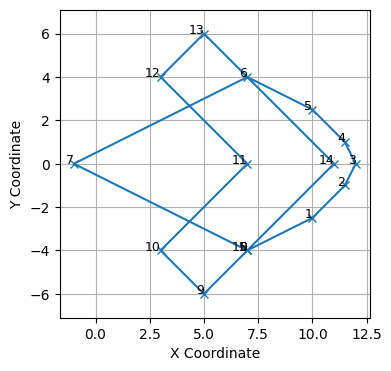

In [3]:
cat_face_coordinates = [
    # Start from the bottom of the left ear
    (-4, 7), (-3.5, 8), (-3, 9), (-2.5, 10), (-2, 10.5), (-1.5, 11), (-1, 11.5), (-0.5, 11.75), (0, 12),
    # Top of head to the right ear
    (0.5, 11.75), (1, 11.5), (1.5, 11), (2, 10.5), (2.5, 10), (3, 9), (3.5, 8), (4, 7),
    # Right side of the face
    (3.5, 6), (3, 5), (2.5, 4), (2, 3), (1.5, 2), (1, 1), (0.5, 0), (0, -1),
    # Bottom of the face and left side
    (-0.5, 0), (-1, 1), (-1.5, 2), (-2, 3), (-2.5, 4), (-3, 5), (-3.5, 6), (-4, 7),
    # Adding whiskers on the left side
    (-4.5, 6.5), (-5, 6), (-5.5, 5.5), (-6, 5), (-5.5, 4.5), (-5, 4), (-4.5, 3.5), (-4, 3),
    # Returning to the bottom of the left ear
    (-3.5, 3.5), (-3, 4), (-2.5, 4.5), (-2, 5), (-1.5, 5.5), (-1, 6), (-0.5, 6.5), (0, 7),
    # Crossing to the right side
    (0.5, 6.5), (1, 6), (1.5, 5.5), (2, 5), (2.5, 4.5), (3, 4), (3.5, 3.5), (4, 3),
    # Adding whiskers on the right side
    (4.5, 3.5), (5, 4), (5.5, 4.5), (6, 5), (5.5, 5.5), (5, 6), (4.5, 6.5), (4, 7),
    # Completing the loop back to the start
    (3.5, 7.5), (3, 8), (2.5, 8.5), (2, 9), (1.5, 9.5), (1, 10), (0.5, 10.5), (0, 11),
    (-0.5, 10.5), (-1, 10), (-1.5, 9.5), (-2, 9), (-2.5, 8.5), (-3, 8), (-3.5, 7.5), (-4, 7)
]

# Simplify the cat face coordinates
simplified_cat_face = simplify_coordinates(cat_face_coordinates)
#print("Simplified Coordinates:", simplified_cat_face)

# Extract x and y coordinates
x_coords, y_coords = zip(*cat_face_coordinates)
x2_coords, y2_coords = zip(*simplified_cat_face)

# Plotting
plt.figure(figsize=(4, 4))
#plt.plot(y_coords, x_coords, marker='o')
for i, (x_coord, y_coord) in enumerate(simplified_cat_face):
    plt.text(y_coord, x_coord, str(i), fontsize=9, ha='right')

plt.plot(y2_coords, x2_coords, marker='x')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Ensure the aspect ratio is equal to maintain the shape
plt.show()

In [4]:
contour = simplified_cat_face
map_center = (48.8675, 2.3638)  
radius = 0.01  # Example radius in degrees (approx 1 km)

poly =  Polygon.from_list(coordinates_list=contour, system="cartesian")
projection = Projection(center=map_center, radius=radius, map_type="GPS")
gps_poly = projection.apply(poly)
bicycle_contour = gps_poly.get_nearest_bicycle_road_points(dist=2000)

actual_bicycle_contour, path_mapping = Route(bicycle_contour).fill_paths_between_points()
final_contour = actual_bicycle_contour.filter_close_points()

#plot_route(map_center=map_center, route=bicycle_contour)
plot_route(map_center=map_center, route=final_contour)

[(48.8646241, 2.3640156), (48.8657293, 2.3662336), (48.8666509, 2.3673468), (48.8675419, 2.3679208), (48.8687437, 2.3673318), (48.8704561, 2.3663507), (48.8715703, 2.3635654), (48.8675036, 2.355827), (48.8646241, 2.3640156), (48.8627724, 2.3610521), (48.8647062, 2.3597995), (48.868106, 2.3636766), (48.8715027, 2.3603436), (48.8731067, 2.3614285), (48.8684079, 2.3662262), (48.8646241, 2.3640156)]
(48.8646241, 2.3640156) (48.8657293, 2.3662336)
best [(48.8646, 2.364), (48.8647, 2.3645), (48.8652, 2.3653), (48.8645, 2.3661), (48.8647, 2.3659), (48.8657, 2.3662)]
-----------
(48.8657293, 2.3662336) (48.8666509, 2.3673468)
best [(48.8657, 2.3662), (48.8657, 2.3663), (48.8662, 2.3663), (48.8661, 2.3665), (48.8667, 2.3673)]
-----------
(48.8666509, 2.3673468) (48.8675419, 2.3679208)
best [(48.8667, 2.3673), (48.8667, 2.3674), (48.8675, 2.3679)]
-----------
(48.8675419, 2.3679208) (48.8687437, 2.3673318)
best [(48.8675, 2.3679), (48.8676, 2.368), (48.8687, 2.3673)]
-----------
(48.8687437, 2.3

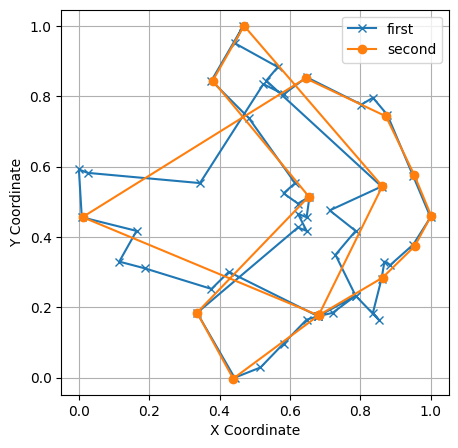

In [5]:
plot_compare_polygons(final_contour, bicycle_contour)

In [6]:
from stravart.metrics import *

#Area of the difference between each segment and directions for the segment
diff_area(actual_bicycle_contour, path_mapping)

ModuleNotFoundError: No module named 'cv2'

## Operations

In [ ]:
from stravart.operations import *

normed_poly = poly.scale_coordinates()
distortion = RadialDistortion(distortion_factor=0.3).apply(normed_poly)

plot_contours(normed_poly, distortion)

In [ ]:
rotation = Rotation(angle=20).apply(normed_poly)
plot_contours(normed_poly, rotation)